<a href="https://colab.research.google.com/github/cindytrac/DS3010-Group11/blob/main/Copy_of_CaseStudy3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study 3 : Textual analysis of movie reviews

**Due Date: February 22, 2020, BEFORE the beginning of class at 2:00pm ET**

NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!

<img src="https://getthematic.com/wp-content/uploads/2018/03/Harris-Word-Cloud-e1522406279125.png">

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

    Aruzhan
    
    Cindy
    
    Tiffany

**Desired outcome of the case study.**
* In this case study we will look at movie reviews from the v2.0 polarity dataset comes from
the http://www.cs.cornell.edu/people/pabo/movie-review-data.
    * It contains written reviews of movies divided into positive and negative reviews.
* As in Case Study 2 idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* This case study will be based upon the scikit-learn Python library
* We will build upon the tutorial "Working With Text Data" which can be found at http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
* In particular, this case study is quite similar to "Exercise 2: Sentiment Analysis on movie reviews" on the above web page.
* Read about deep learning at https://scikit-learn.org/stable/modules/neural_networks_supervised.html


**Case study assumptions:**
* You have access to a python installation

**Required Python libraries:**
* Numpy (www.numpy.org) (should already be installed from Case Study 2)
* Matplotlib (matplotlib.org) (should already be installed from Case Study 2)
* Scikit-learn (scikit-learn.org).
* You are also welcome to use the Python Natural Language Processing Toolkit (www.nltk.org) (though it is not required).

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

# Getting the data onto Colab example.

In [ ]:
! wget https://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz

--2022-02-20 17:23:04--  https://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz
Resolving www.cs.cornell.edu (www.cs.cornell.edu)... 132.236.207.36
Connecting to www.cs.cornell.edu (www.cs.cornell.edu)|132.236.207.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3127238 (3.0M) [application/x-gzip]
Saving to: ‘review_polarity.tar.gz’

review_polarity.tar 100%[===================>]   2.98M  --.-KB/s    in 0.1s    

2022-02-20 17:23:04 (24.9 MB/s) - ‘review_polarity.tar.gz’ saved [3127238/3127238]



Look for the directory txt_sentoken

In [ ]:
! tar xzf review_polarity.tar.gz
! ls

exercise_02_sentiment.py  poldata.README.2.0	  sample_data
fetch_data.py		  review_polarity.tar.gz  txt_sentoken


Set Up Libraries

In [ ]:
import matplotlib
import numpy as np
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Problem 1 (10 points): Complete Exercise 2: Sentiment Analysis on movie reviews from http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

* Installing scikit-learn using Anaconda does not necessarily download the example source-code.
* Accordingly, you may need to download these directly from Github at https://github.com/scikit-learn/scikit-learn:
    * The data can be downloaded using doc/tutorial/text_analytics/data/movie_reviews/fetch_data.py
    * A skeleton for the solution can be found in doc/tutorial/text_analytics/skeletons/exercise_02_sentiment.py
    * A completed solution can be found in doc/tutorial/text_analytics/solutions/exercise_02_sentiment.py
* Here is a direct link to the code to help you out:  https://github.com/scikit-learn/scikit-learn/tree/main/doc/tutorial/text_analytics
* **It is ok to use the solution provided in the scikit-learn distribution as a starting place for your work.**

### Modify the solution to Exercise 2 so that it can run in this iPython notebook
* This will likely involve moving around data files and/or small modifications to the script.

Set Up Scikit Exercise 2 Data

In [ ]:
! wget https://raw.githubusercontent.com/scikit-learn/scikit-learn/main/doc/tutorial/text_analytics/data/movie_reviews/fetch_data.py
%run /content/fetch_data.py


--2022-02-20 17:23:10--  https://raw.githubusercontent.com/scikit-learn/scikit-learn/main/doc/tutorial/text_analytics/data/movie_reviews/fetch_data.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 745 [text/plain]
Saving to: ‘fetch_data.py.1’

fetch_data.py.1     100%[===================>]     745  --.-KB/s    in 0s      

2022-02-20 17:23:10 (33.8 MB/s) - ‘fetch_data.py.1’ saved [745/745]



"\nmoviedir = r'D:\\Lab\nltk_data\\corpora\\movie_reviews'\nmovie = load_files(moviedir, shuffle=True)\nlen(movie.data)\n"

Import Scikit Exercise 2 Solution Code

In [12]:
! wget https://raw.githubusercontent.com/scikit-learn/scikit-learn/main/doc/tutorial/text_analytics/solutions/exercise_02_sentiment.py

--2022-02-20 17:26:07--  https://raw.githubusercontent.com/scikit-learn/scikit-learn/main/doc/tutorial/text_analytics/solutions/exercise_02_sentiment.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3140 (3.1K) [text/plain]
Saving to: ‘exercise_02_sentiment.py’

exercise_02_sentime 100%[===================>]   3.07K  --.-KB/s    in 0s      

2022-02-20 17:26:07 (53.2 MB/s) - ‘exercise_02_sentiment.py’ saved [3140/3140]



n_samples: 2000
0 params - {'vect__ngram_range': (1, 1)}; mean - 0.84; std - 0.01
1 params - {'vect__ngram_range': (1, 2)}; mean - 0.86; std - 0.02
              precision    recall  f1-score   support

         neg       0.83      0.85      0.84       242
         pos       0.85      0.84      0.85       258

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500

[[205  37]
 [ 41 217]]


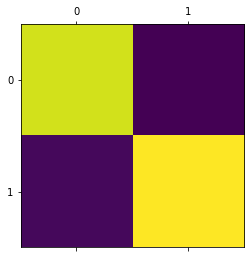

In [21]:
# EXAMPLE CODE TAKEN FROM SCIKIT 
# Our team used this code as a starting point

"""Build a sentiment analysis / polarity model

Sentiment analysis can be casted as a binary text classification problem,
that is fitting a linear classifier on features extracted from the text
of the user messages so as to guess whether the opinion of the author is
positive or negative.

In this examples we will use a movie review dataset.

"""
# Author: Olivier Grisel <olivier.grisel@ensta.org>
# License: Simplified BSD

if __name__ == "__main__":
    # NOTE: we put the following in a 'if __name__ == "__main__"' protected
    # block to be able to use a multi-core grid search that also works under
    # Windows, see: http://docs.python.org/library/multiprocessing.html#windows
    # The multiprocessing module is used as the backend of joblib.Parallel
    # that is used when n_jobs != 1 in GridSearchCV

    # the training data folder must be passed as first argument
    movie_reviews_data_folder = '/content/txt_sentoken'
    dataset = load_files(movie_reviews_data_folder, shuffle=False)
    print("n_samples: %d" % len(dataset.data))

    # split the dataset in training and test set:
    docs_train, docs_test, y_train, y_test = train_test_split(
        dataset.data, dataset.target, test_size=0.25, random_state=None)

    # TASK: Build a vectorizer / classifier pipeline that filters out tokens
    # that are too rare or too frequent
    pipeline = Pipeline([
        ('vect', TfidfVectorizer(min_df=3, max_df=0.95)),
        ('clf', LinearSVC(C=1000)),
    ])

    # TASK: Build a grid search to find out whether unigrams or bigrams are
    # more useful.
    # Fit the pipeline on the training set using grid search for the parameters
    parameters = {
        'vect__ngram_range': [(1, 1), (1, 2)],
    }
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
    grid_search.fit(docs_train, y_train)

    # TASK: print the mean and std for each candidate along with the parameter
    # settings for all the candidates explored by grid search.
    n_candidates = len(grid_search.cv_results_['params'])
    for i in range(n_candidates):
        print(i, 'params - %s; mean - %0.2f; std - %0.2f'
                 % (grid_search.cv_results_['params'][i],
                    grid_search.cv_results_['mean_test_score'][i],
                    grid_search.cv_results_['std_test_score'][i]))

    # TASK: Predict the outcome on the testing set and store it in a variable
    # named y_predicted
    y_predicted = grid_search.predict(docs_test)

    # Print the classification report
    print(metrics.classification_report(y_test, y_predicted,
                                        target_names=dataset.target_names))

    # Print and plot the confusion matrix
    cm = metrics.confusion_matrix(y_test, y_predicted)
    print(cm)

    import matplotlib.pyplot as plt
    plt.matshow(cm)
    plt.show()

## Problem 2 (10 points): Explore the scikit-learn TfidVectorizer class

**Read the documentation for the TfidVectorizer class at http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html.** 
* Define the term frequency–inverse document frequency (TF-IDF) statistic (http://en.wikipedia.org/wiki/Tf%E2%80%93idf will likely help).
* Run the TfidVectorizer class on the training data above (docs_train).
* Explore the min_df and max_df parameters of TfidVectorizer.  What do they mean? How do they change the features you get?
* Explore the ngram_range parameter of TfidVectorizer.  What does it mean? How does it change the features you get? (Note, large values  of ngram_range may take a long time to run!)

***a. Term Frequency–Inverse Document Frequency (TF-IDF)*** 

> **TF-IDF** is a quantitative statistic that reflects the importance of a word within a collection. TF-IDF computes a score for each word. The weight of each term is proportional to it's frequency (how many times the word appears in the text). This technique is often used in the fields of text mining and information retrieval.
















***b. min_df and max_df of TfidVectorizer***

>  You can use **min_df** to remove terms that appear too infrequently whereas you can use **max_df** to remove terms that appear too frequently. The given threshold is called corpus-specific stop words and the parameter is a proportion of the docs. The default for both min_df and max_df is 1, meaning it ignores terms that appear in less/more than 1 doc (does not ignore any terms). 

 >>**min_df** example:

>>*   min_df = 0.02 → ignore terms that appear in LESS than 2% of the documents

>>**max_df** example: 

>>*   max_df= 0.25 → ignore terms that appear in MORE than 25% of the documents





***c. ngram_range of TfidVectorizer***

>  For different extracted n-grams, **ngram_range** sets the lower and upper boundaries of the range of n-values. 

>>**ngram_range** example:
ngram_range = (1,2) → unigrams and bigrams
>>*   large ngram_range values may take a very long time to run

In [54]:
# the training data folder must be passed as first argument
movie_reviews_data_folder = '/content/txt_sentoken'
dataset = load_files(movie_reviews_data_folder, shuffle=False)
print("n_samples: %d" % len(dataset.data))

# list of category names
print(dataset.target_names)

# files are loaded in memory in the data attribute
#print(len(dataset.data))
#print(len(dataset.filenames))

# tokenizing text with scikit-learn -----------------------------------------
# using docs_train
docs_train, docs_test, y_train, y_test = train_test_split(
        dataset.data, dataset.target, test_size=0.25, random_state=None)

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(docs_train)
X_train_counts.shape
print("Number of words? =", X_train_counts.shape[1])

# converting from occurrences to frequencies
from sklearn.feature_extraction.text import TfidfTransformer

# fit estimator to data
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)

# transform  count-matrix to a tf-idf representation
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape




n_samples: 2000
['neg', 'pos']
Number of words? = 39659


(2000, 39659)

In [ ]:
# aru code?
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import load_files

corpus = [
          'This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

print(X.shape)


from sklearn.model_selection import train_test_split
docs_train, docs_test, y_train, y_test = train_test_split(movie.data, movie.target, 
                                                          test_size = 0.20, random_state = 12)

(4, 9)


NameError: ignored

## Problem 3 (15 points): Machine learning algorithms


* Based upon Problem 2 pick some parameters for TfidfVectorizer
    * "fit" your TfidfVectorizer using docs_train
    * Compute "Xtrain", a Tf-idf-weighted document-term matrix using the transform function on docs_train
    * Compute "Xtest", a Tf-idf-weighted document-term matrix using the transform function on docs_test
    * Note, be sure to use the same Tf-idf-weighted class (**"fit" using docs_train**) to transform **both** docs_test and docs_train
* Examine two classifiers provided by scikit-learn 
    * LinearSVC
    * KNeighborsClassifier
    * Why do you think it might be working better?
* For a particular choice of parameters and classifier, look at 2 examples where the prediction was incorrect.
    * Can you conjecture on why the classifier made a mistake for this prediction?

"fit" your TfidfVectorizer using docs_train

In [113]:
# fitting using docs_train

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from scipy.sparse.csr import csr_matrix

# dataset.target

#instantiate CountVectorizer() 
count_vect_train = CountVectorizer()
X_counts = count_vect_train.fit_transform(dataset.data)
y_counts = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X_counts, y_counts, test_size = 0.20, random_state = 12)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# # this steps generates word counts for the words in your docs 
# X_train_counts = count_vect_train.fit_transform(X_train)
# X_test_counts = count_vect_train.fit_transform(X_test)
# X_train_counts.shape

# print("Number of words =", X_train_counts.shape[1])

(1600, 39659)
(400, 39659)
(1600,)
(400,)


In [95]:
print(len(docs_train))
print(len(docs_test))

1500
500


Compute "Xtrain", a Tf-idf-weighted document-term matrix using the transform function on docs_train


In [114]:
'''
# Initialize the parameters of the vectorizer
vectorizer = TfidfVectorizer(input=docs_train, analyzer='word', ngram_range=(1,1),
                     min_df = 0, stop_words=None)

X = vectorizer.fit_transform(docs_train)
vectorizer.get_feature_names_out()
X.shape
'''

# fit estimator to data
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train)

# transform count-matrix to a tf-idf representation
X_train_tf = tf_transformer.transform(X_train)
print(X_train_tf.shape)
print(X_train_tf)


(1600, 39659)
  (0, 49)	0.008719751330189448
  (0, 161)	0.008719751330189448
  (0, 172)	0.008719751330189448
  (0, 183)	0.008719751330189448
  (0, 185)	0.008719751330189448
  (0, 186)	0.008719751330189448
  (0, 205)	0.026159253990568343
  (0, 800)	0.008719751330189448
  (0, 865)	0.008719751330189448
  (0, 915)	0.008719751330189448
  (0, 966)	0.008719751330189448
  (0, 999)	0.008719751330189448
  (0, 1027)	0.008719751330189448
  (0, 1094)	0.008719751330189448
  (0, 1256)	0.017439502660378896
  (0, 1268)	0.017439502660378896
  (0, 1271)	0.008719751330189448
  (0, 1275)	0.008719751330189448
  (0, 1287)	0.008719751330189448
  (0, 1502)	0.017439502660378896
  (0, 1559)	0.008719751330189448
  (0, 1579)	0.026159253990568343
  (0, 1599)	0.017439502660378896
  (0, 1686)	0.017439502660378896
  (0, 1718)	0.043598756650947236
  :	:
  (1599, 37372)	0.02520563459323681
  (1599, 37514)	0.02520563459323681
  (1599, 37720)	0.05041126918647362
  (1599, 37843)	0.02520563459323681
  (1599, 38019)	0.025205

Compute "Xtest", a Tf-idf-weighted document-term matrix using the transform function on docs_test

In [115]:


# converting from occurrences to frequencies
from sklearn.feature_extraction.text import TfidfTransformer

# fit estimator to data
tf_transformer = TfidfTransformer(use_idf=False).fit(X_test)

# transform count-matrix to a tf-idf representation
X_test_tf = tf_transformer.transform(X_test)
print(X_test_tf.shape)
print(X_test_tf)

(400, 39659)
  (0, 211)	0.015410168209838634
  (0, 212)	0.015410168209838634
  (0, 502)	0.06164067283935454
  (0, 556)	0.0924610092590318
  (0, 605)	0.015410168209838634
  (0, 638)	0.015410168209838634
  (0, 750)	0.03082033641967727
  (0, 826)	0.015410168209838634
  (0, 966)	0.03082033641967727
  (0, 967)	0.0924610092590318
  (0, 982)	0.015410168209838634
  (0, 992)	0.03082033641967727
  (0, 1256)	0.015410168209838634
  (0, 1283)	0.015410168209838634
  (0, 1301)	0.015410168209838634
  (0, 1502)	0.0462305046295159
  (0, 1562)	0.015410168209838634
  (0, 1577)	0.015410168209838634
  (0, 1718)	0.015410168209838634
  (0, 1726)	0.015410168209838634
  (0, 1738)	0.015410168209838634
  (0, 1755)	0.015410168209838634
  (0, 1760)	0.06164067283935454
  (0, 1810)	0.21574235493774088
  (0, 1855)	0.015410168209838634
  :	:
  (399, 38133)	0.013863506393873152
  (399, 38347)	0.013863506393873152
  (399, 38405)	0.16636207672647782
  (399, 38469)	0.013863506393873152
  (399, 38475)	0.013863506393873152
 

Examining LinearSVC and KNeighborsClassifier

In [120]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
'''
docs_train, docs_test, y_train, y_test = train_test_split(
        dataset.data, dataset.target, test_size=0.25, random_state=None)
'''

# USING LINEAR SUPPORT VECTOR MACHINE (SVM)

from sklearn import svm

SVC_clf = svm.SVC()

print("Shape of X_train_tf: ", X_train_tf.shape[0], ", ", X_train_tf.shape[1])
print("Shape of X_test_tf: ", X_test_tf.shape[0], ", ", X_test_tf.shape[1])

SVC_clf.fit(X_train_tf, y_train)
y_predicted = SVC_clf.predict(X_test_tf)
pred = np.mean(y_predicted == y_test)

print("Achieved",(pred*100),"% accuracy using SVC")
print()





Shape of X_train_tf:  1600 ,  39659
Shape of X_test_tf:  400 ,  39659
Achieved 80.5 % accuracy using SVC



In [119]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
'''
docs_train, docs_test, y_train, y_test = train_test_split(
        dataset.data, dataset.target, test_size=0.25, random_state=None)
'''

# USING LINEAR SUPPORT VECTOR MACHINE (SVM)

from sklearn.linear_model import SGDClassifier
text_clf = KNeighborsClassifier(n_neighbors=10)
# y_train = np.reshape(y_train, (-1, 1))

print("Shape of X_train_tf: ", X_train_tf.shape[0], ", ", X_train_tf.shape[1])
print("Shape of X_test_tf: ", X_test_tf.shape[0], ", ", X_test_tf.shape[1])

text_clf.fit(X_train_tf, y_train)
y_predicted = text_clf.predict(X_test_tf)
pred = np.mean(y_predicted == y_test)

print("Achieved",(pred*100),"% accuracy using KNN")
print()

# print(metrics.classification_report(docs_test, predicted,
#      target_names=dataset.target_names))

# metrics.confusion_matrix(docs_test, predicted)

Shape of X_train_tf:  1600 ,  39659
Shape of X_test_tf:  400 ,  39659
Achieved 61.25000000000001 % accuracy using KNN



## Problem 4 (15 points): Use a Multi-Layer Perceptron (MLP) for classifying the reviews.  Explore the parameters for the MLP and compare the accuracies against your baseline algorithms in Problem 1.

**Read the documentation for the MLPClassifier class at https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier.** 
* Note: This is *very similar* to using the LinearSVC and KNeighborsClassifier classes above!
* Try different values for "hidden_layer_sizes".  What do you observe in terms of accuracy?
* Try different values for "activation". What do you observe in terms of accuracy?


## Problem 5 (10 points): Accuracy is not everything!  How fast are the algorithms versus their accuracy?
**Compare the runtime of your  baseline algorithms to the runtime of the MLPClassifier** 

**The jupyter command %timeit can be used to measure how long a calculation takes https://ipython.readthedocs.io/en/stable/interactive/magics.html.**
* Try different values for "hidden_layer_sizes".  What do you observe in terms of runtime?
* Try different values for "activation". What do you observe in terms of runtime?
* How long does the "fit" function take as opposed to the "predict" function?  Can you explain why?


## Problem 6 (20 points): Business question

* Suppose you had a machine learning algorithm that could detect the sentiment of tweets that was highly accurate.  What kind of business could you build around that?
* Who would be your competitors, and what are their sizes?
* What would be the size of the market for your product?
* In addition, assume that your machine learning was slow to train, but fast in making predictions on new data.  How would that affect your business plan?
* How could you use the cloud to support your product?

1. The business that could be built with the case of a machine learning algorith detecting tweets accurately is for a online clothing shop. Specifically, one that gathers multiple brands in their store. The shop would need to see brands that have the most accurate reviews and within those results the shop can look at which brands to invest in. With more accurate brands that have the best reviews, the more people would buy from them as there products are high quality and approved by many. 

2. Other competitors would be other online shops as well as other brands that would want their products to be brought into these shops. It creates external competition with other clothing stores that are doing the same thing as well as internal competitions within brands that want their products to be distruibuted. 

3. The size of this market is not as large as regular clothing companies that are their own brand themselves. Since this businesss collects many other brands to sell, the market would be mid sized.

4.

5. 

# Slides (for a 5-8 minute presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)


# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* **Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What data you collected? 
    * Why this topic is interesting or important to you? (Motivations)
    * How did you analyse the data?
    * What did you find in the data? 
 
     (please include figures or tables in the report, but no source code)


*Please compress all the files into a single zipped file.*


** How to submit: **

        Please submit through canvas.wpi.edu

### DS3010 Case Study 3 Team ??

#### where ?? is your team number.
        
** Note: Each team just needs to submits one submission **

# Grading Criteria:

**Total Points: 100**


---------------------------------------------------------------------------
**Notebook results:**
    Points: 80


    -----------------------------------
    Question 1:
    Points: 10
    -----------------------------------
    
    -----------------------------------
    Question 2:
    Points: 10
    -----------------------------------
        
    -----------------------------------
    Question 3:
    Points: 15 
    -----------------------------------
  
    -----------------------------------
    Question 4:  
    Points: 15
    -----------------------------------

    -----------------------------------
    Question 5:  
    Points: 10
    -----------------------------------

    -----------------------------------
    Question 6:  
    Points: 20
    -----------------------------------

---------------------------------------------------------------------------
**Slides (for a 5-8 minute presentation): Story-telling**
    Points: 20


1. Motivation about the data collection, why the topic is interesting to you.
    Points: 5 

2. Communicating Results (figure/table)
    Points: 10 

3. Story telling (How all the parts (data, analysis, result) fit together as a story?)
    Points: 5 
